# Practical 12

## Aim : Apply SVD on image and find the minimum number of components are required so that the image don't get blurred

In [1]:
# Import module
# Import PIL module
from PIL import Image
# open method used to open different extension image file
im = Image.open(r"D:\Sem 4\AML\WhatsApp Image 2023-04-26 at 11.38.06 AM.jpeg")
im.show()

Text(0.5, 1.0, 'Orignal RGB Image')

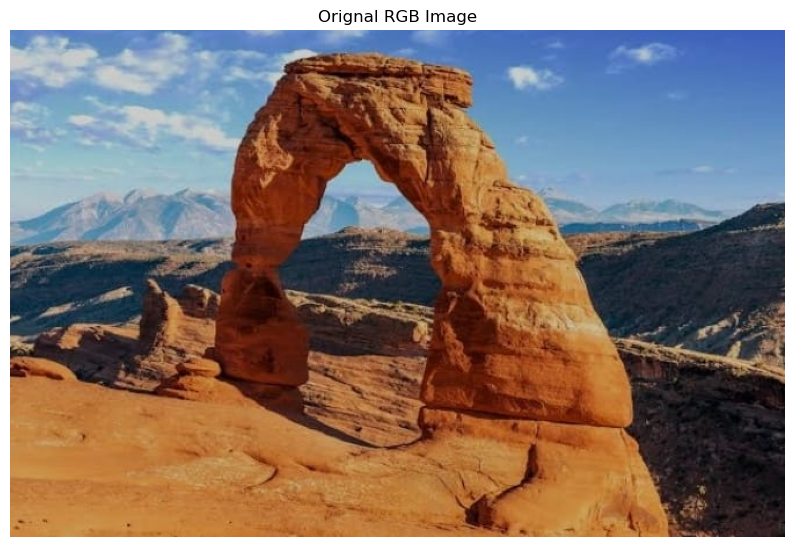

In [2]:
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd

img = cv2.imread(r"D:\Sem 4\AML\WhatsApp Image 2023-04-26 at 11.38.06 AM.jpeg")
plt.figure(figsize = (10,10))
plt.axis("off")  # to hide axis use "off"
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Orignal RGB Image')

In [3]:
#calculate the svd
u,s,v = np.linalg.svd(img, full_matrices = False)
#ispect shape of the matrices
print(f'u.shape:{u.shape}, s.shape:{s.shape}, v.shape:{v.shape}')

u.shape:(438, 669, 3), s.shape:(438, 3), v.shape:(438, 3, 3)


Text(0.5, 1.0, 'Gray Image')

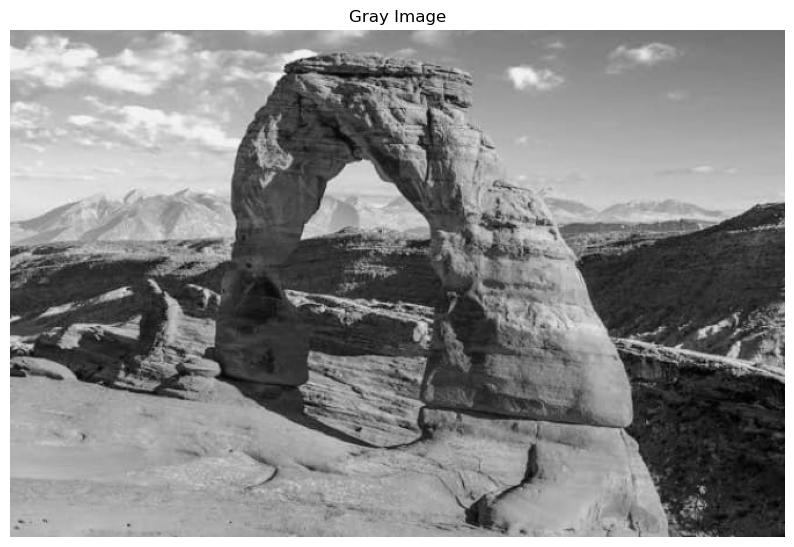

In [4]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (10,10))
plt.axis("off")  # to hide axis use "off"
plt.imshow(gray_image, cmap = "gray")
plt.title('Gray Image')

In [5]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#calculate the svd
u,s,v = np.linalg.svd(gray_image, full_matrices = False)
#ispect shape of the matrices
print(f'u.shape:{u.shape}, s.shape:{s.shape}, v.shape:{v.shape}')

u.shape:(438, 438), s.shape:(438,), v.shape:(438, 669)


In [6]:
# The above output shape indicate that there are 720 linrearly independent dimensions

Text(0.5, 1.0, 'Actual Image')

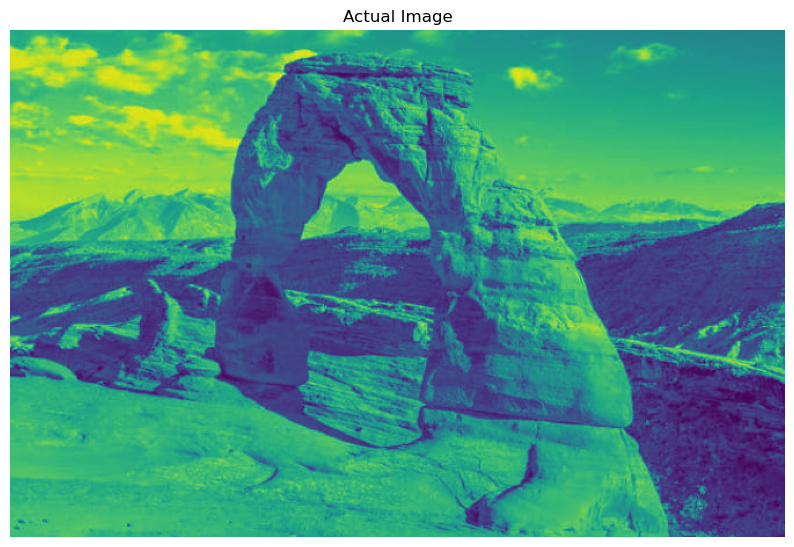

In [7]:
plt.figure(figsize = (10,10))
orig_rank = u[:, :] @ np.diag(s[:]) @ v[:, :]
plt.axis("off")  # to hide axis use "off"
plt.imshow(orig_rank)
plt.title('Actual Image')

Variance explained by top 20 singular values:
[9.09497e-01 2.72270e-02 1.20590e-02 7.78300e-03 4.45000e-03 4.19800e-03
 3.06500e-03 2.54400e-03 2.27900e-03 1.81400e-03 1.50200e-03 1.44200e-03
 1.26300e-03 1.16700e-03 1.08200e-03 1.03700e-03 8.96000e-04 8.15000e-04
 7.32000e-04 6.65000e-04]


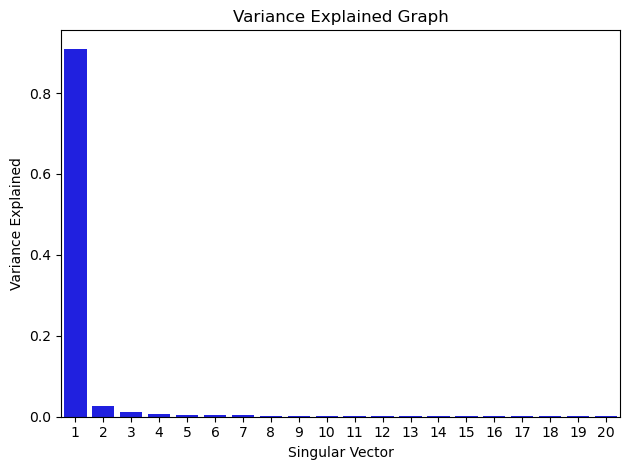

In [8]:
import seaborn as sns
var_explained = np.round(s**2/np.sum(s**2), decimals = 6)
print (f'Variance explained by top 20 singular values:\n{var_explained[0:20]}')

sns.barplot(x = list(range(1,21)), y = var_explained[0:20] , color = 'blue')
plt.title('Variance Explained Graph')
plt.xlabel('Singular Vector')
plt.ylabel('Variance Explained')
plt.tight_layout()
plt.show()

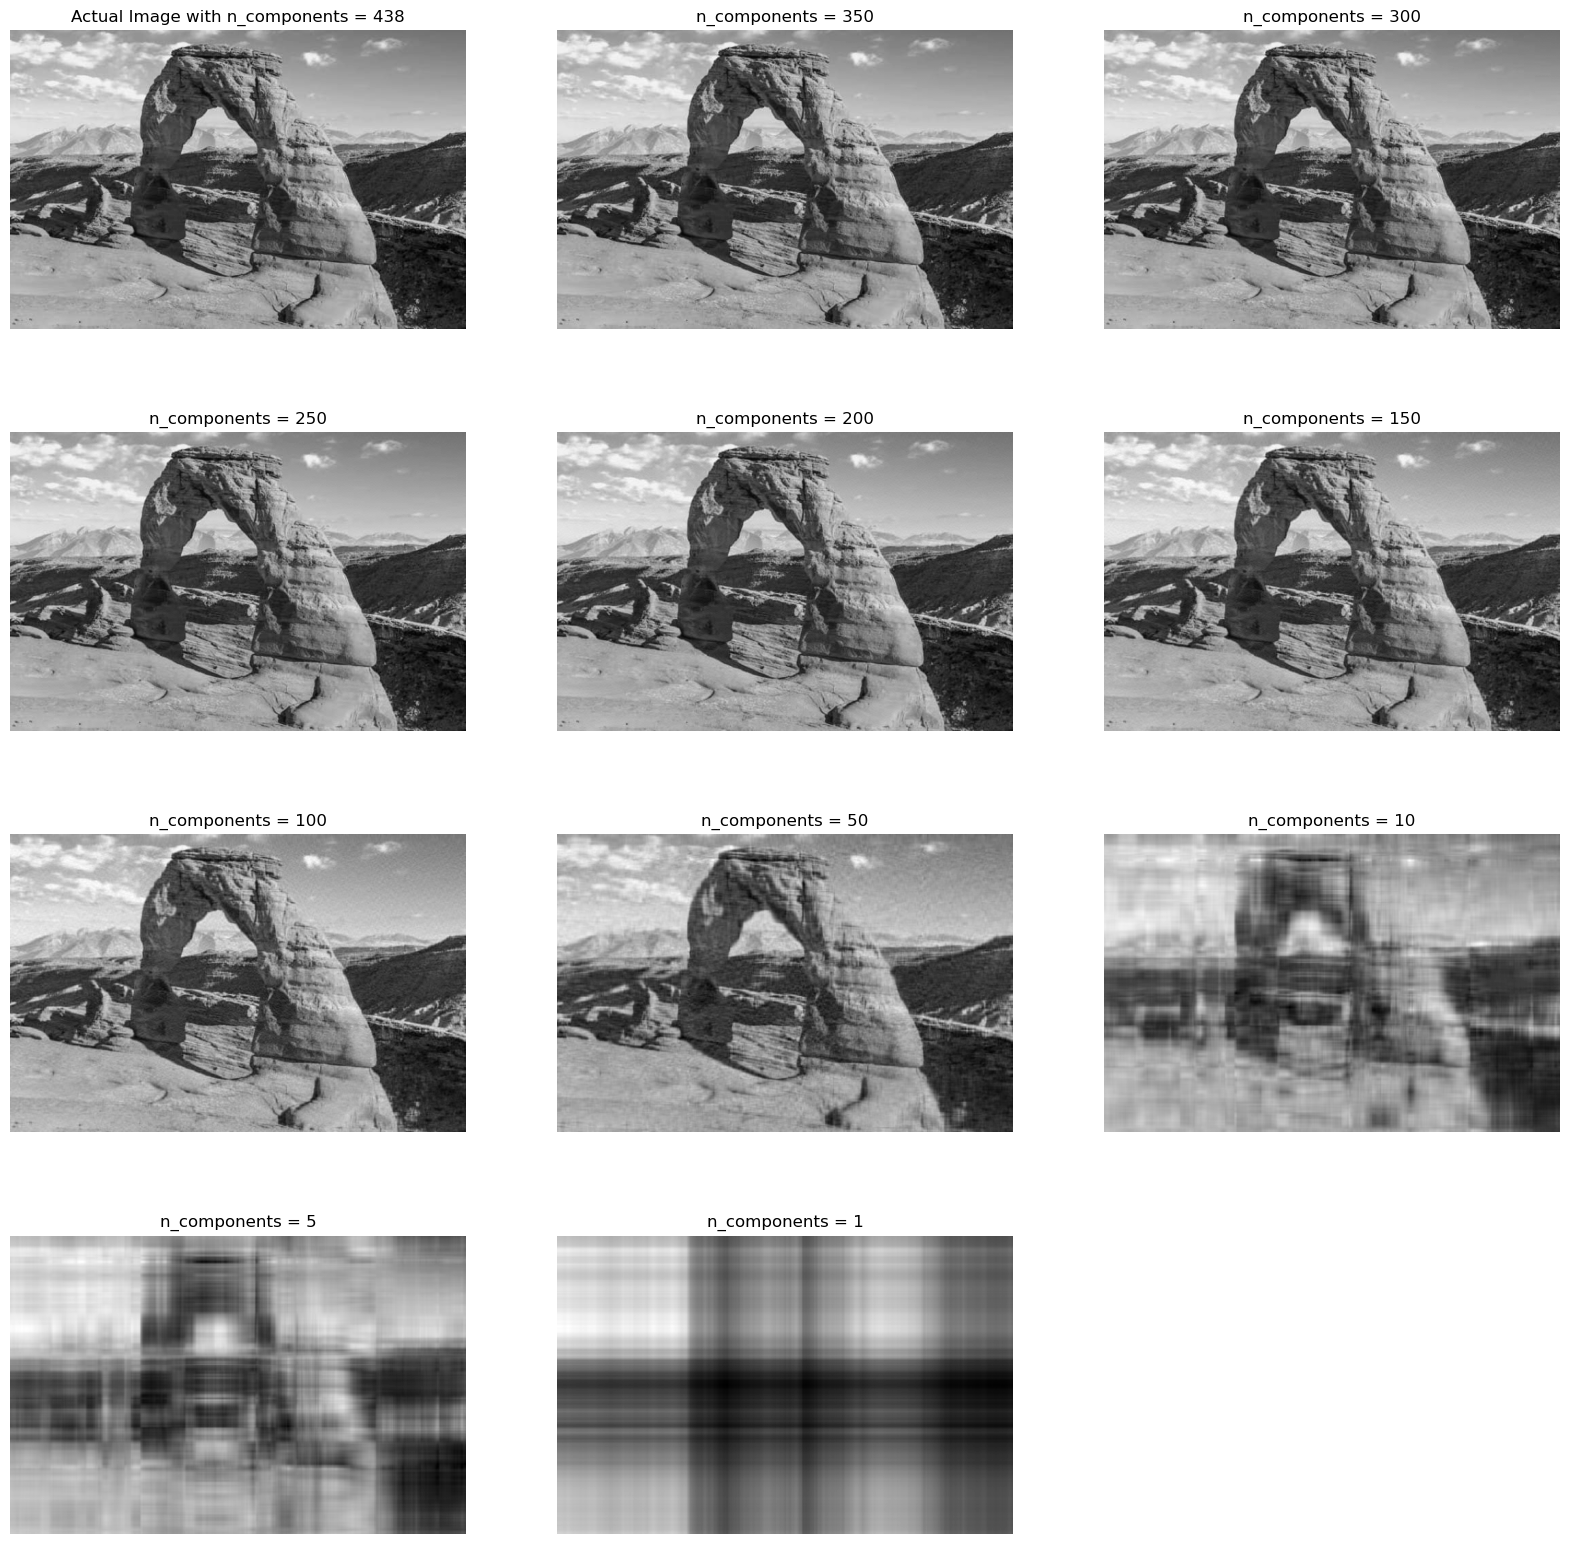

In [20]:
comps = [438, 350, 300, 250, 200, 150, 100, 50, 10, 5, 1]
plt.figure(figsize = (20,20))
for i in range(len(comps)):
    low_rank = u[:, :comps[i]] @ np.diag(s[: comps[i]]) @ v[:comps[i]]
    if(i == 0):
        plt.subplot(4,3,i+1)
        plt.axis("off")  # to hide axis use "off"
        plt.imshow(low_rank, cmap = "gray"),
        plt.title(f'Actual Image with n_components = {comps[i]}')
    else:
        plt.subplot(4,3,i+1)
        plt.axis("off")  # to hide axis use "off"
        plt.imshow(low_rank, cmap = "gray"),
        plt.title(f'n_components = {comps[i]}')

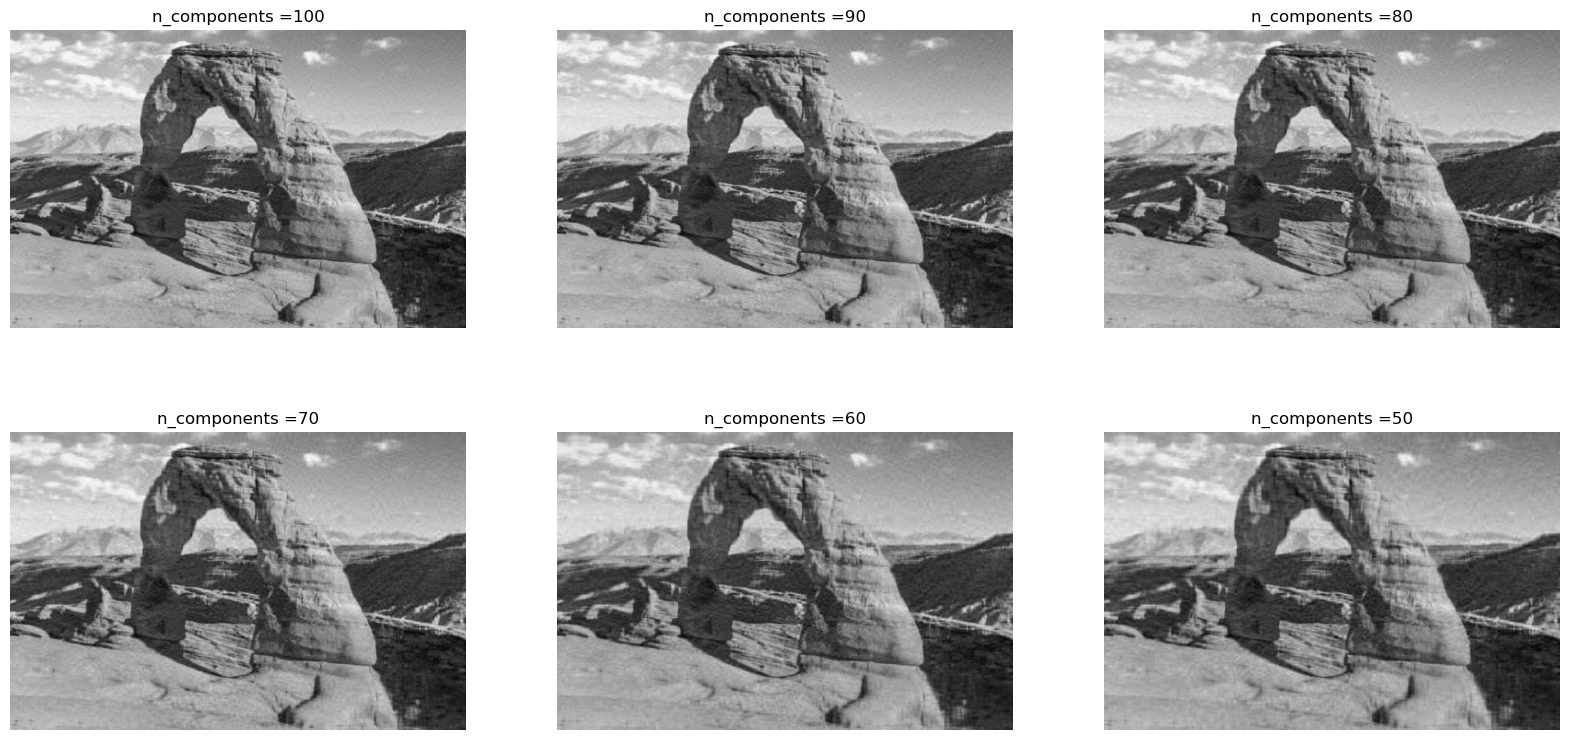

In [19]:
comps = [100, 90, 80, 70, 60, 50]
plt.figure(figsize = (20,20))
for i in range(len(comps)):
    low_rank = u[:, :comps[i]] @ np.diag(s[: comps[i]]) @ v[:comps[i]]
    plt.subplot(4,3,i+1)
    plt.axis("off")  # to hide axis use "off"
    plt.imshow(low_rank, cmap = "gray"),
    plt.title(f'n_components ={comps[i]}')

### As we can see that when the components are reduced to 60 from 438 there is no or least blurring of the image.
### So the minimum number of components are required so that the image don't get blurred is 60